In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_excel(r"D:\JAIMIN\Data Science\Machine Learning\raisin\ML_Raisin_Dataset.xlsx")

In [3]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [4]:
df.shape

(900, 8)

In [5]:
df.info

<bound method DataFrame.info of       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.

In [6]:
df.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class               object
dtype: object

In [7]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [8]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [9]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

In [12]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,-0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,-0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,-0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,-0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,-0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,-0.665981
Class,-0.625715,-0.673194,-0.503102,-0.438500,-0.625567,0.154689,-0.665981,1.000000


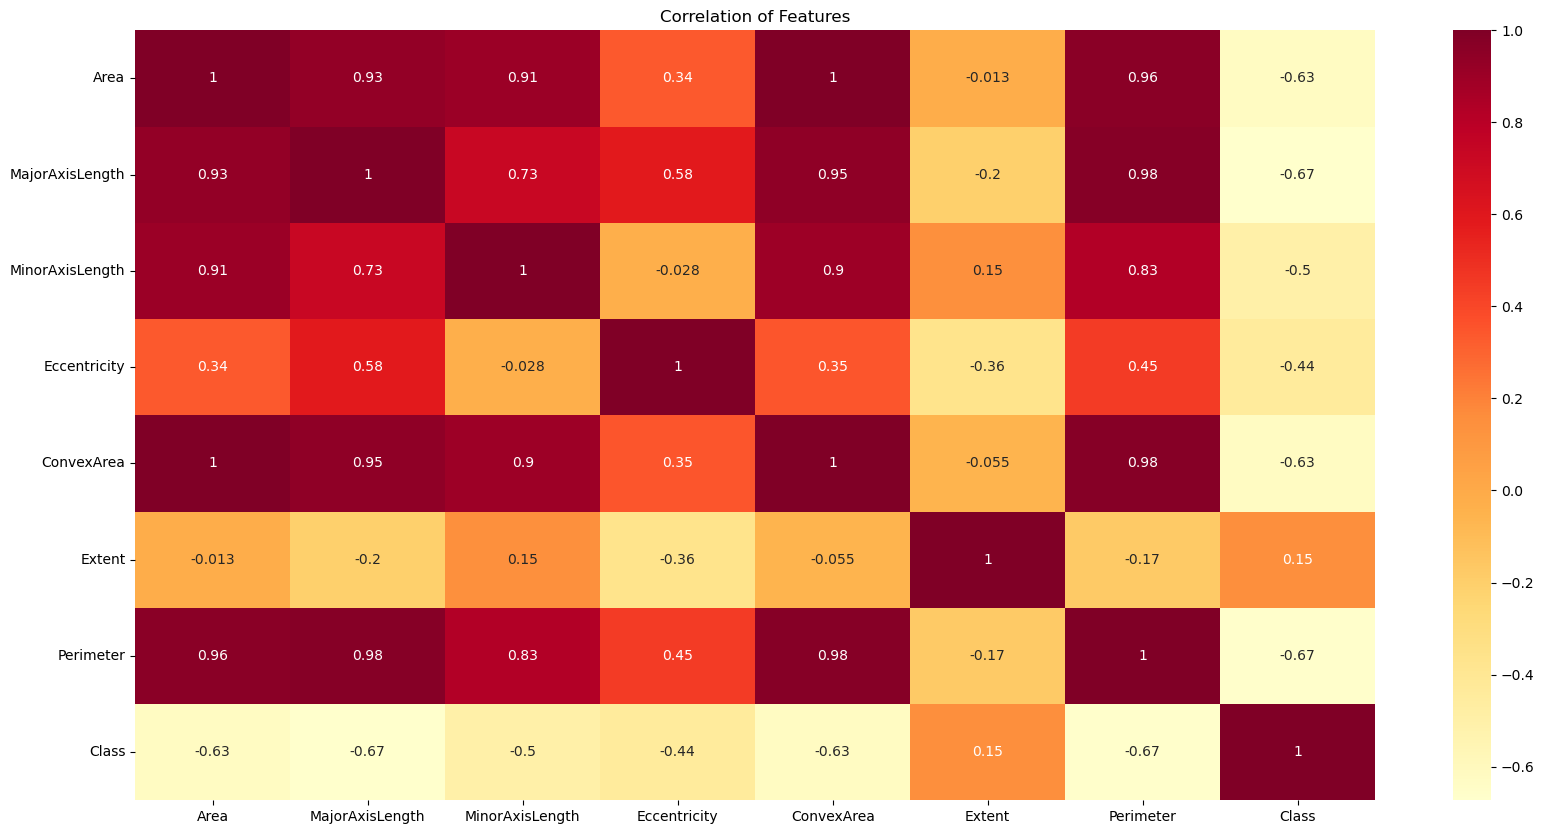

In [13]:
plt.figure(figsize = (20,10))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlOrRd')
plt.title("Correlation of Features")
plt.show()

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


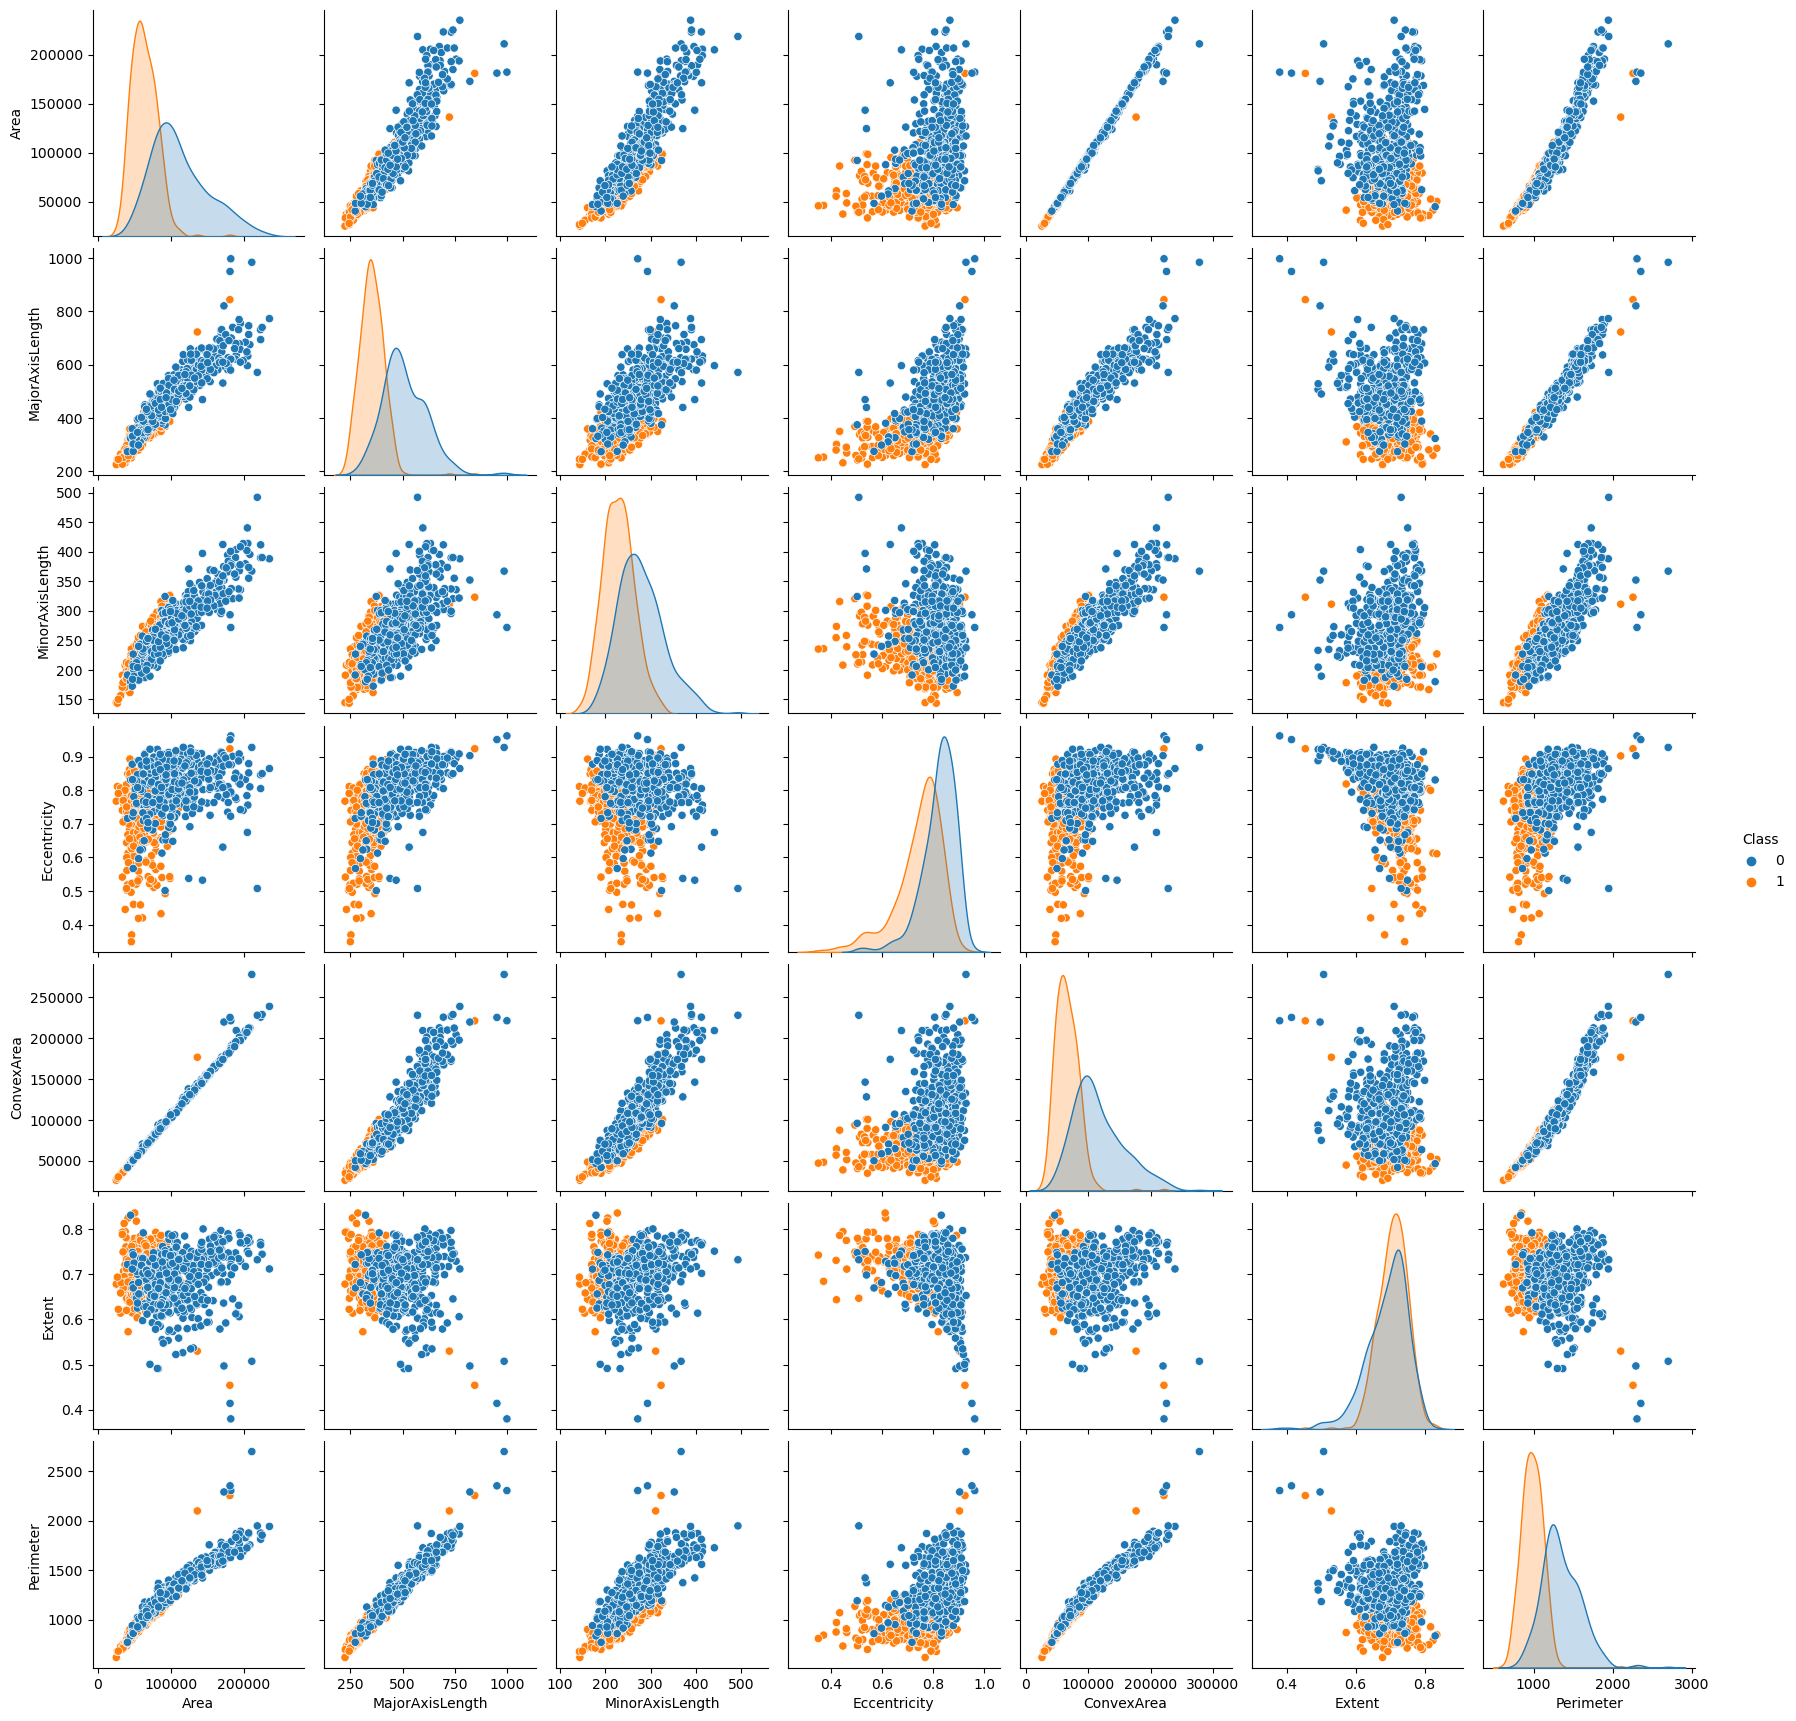

In [14]:
sns.pairplot(df, hue = 'Class')

In [15]:
x = df.drop('Class', axis = 1)
print(x)
y = df['Class']
print(y)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  
0    0.758651   1184.040  
1    0.684130   1121.786  
2    0.637613   1208.575  
3  

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

# NAIVE BAYES FOR CLASSIFICATION

In [17]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [18]:
naive_bayes.score(x_test,y_test)

0.7925925925925926

In [19]:
naive_bayes.score(x_train,y_train)

0.8365079365079365

# LOGISTIC REGRESSION FOR CLASSIFICATION

In [20]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
x,y =load_iris(return_X_y= True)
clf = LogisticRegression(random_state=0).fit(x,y)
clf.predict(x[:2,:])
clf.predict_proba(x[:2,:])
clf.score(x,y)

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

# SUPPORT VECTOR MACHINE FOR CLASSIFICATION

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)

SVC()

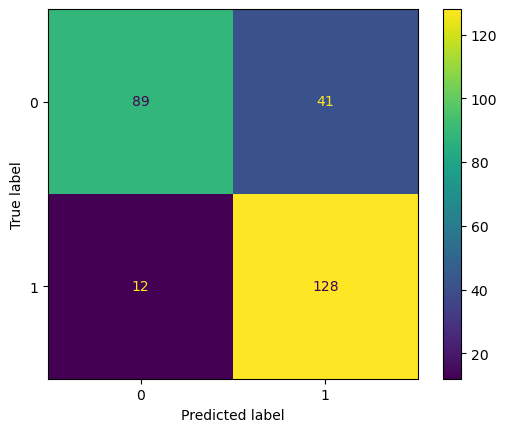

In [22]:
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [23]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
x,y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [24]:
print(clf.named_steps['linearsvc'].coef_)

[[0.14144338 0.52678408 0.67978708 0.49307555]]


In [25]:
print(clf.named_steps['linearsvc'].intercept_)

[0.16935932]


In [26]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x, y)
SVC()

SVC()

In [27]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [28]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8814814814814815


# LOGISTIC REGRESSION FOR CLASSIFICATION

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8740740740740741

# KNN FOR CLASSIFICATION

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = knn.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8222222222222222


# DECISION TREE FOR CLASSIFICATION

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(df.iloc[:,:-1], df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy')

[Text(0.5437925170068028, 0.9705882352941176, 'x[1] <= 422.423\nentropy = 1.0\nsamples = 900\nvalue = [450, 450]'),
 Text(0.26445578231292516, 0.9117647058823529, 'x[6] <= 1006.487\nentropy = 0.647\nsamples = 490\nvalue = [81, 409]'),
 Text(0.404124149659864, 0.9411764705882353, 'True  '),
 Text(0.08843537414965986, 0.8529411764705882, 'x[4] <= 49543.5\nentropy = 0.415\nsamples = 287\nvalue = [24.0, 263.0]'),
 Text(0.05442176870748299, 0.7941176470588235, 'x[5] <= 0.827\nentropy = 0.152\nsamples = 91\nvalue = [2, 89]'),
 Text(0.04081632653061224, 0.7352941176470589, 'x[3] <= 0.716\nentropy = 0.088\nsamples = 90\nvalue = [1, 89]'),
 Text(0.027210884353741496, 0.6764705882352942, 'x[3] <= 0.715\nentropy = 0.222\nsamples = 28\nvalue = [1, 27]'),
 Text(0.013605442176870748, 0.6176470588235294, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.04081632653061224, 0.6176470588235294, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05442176870748299, 0.6764705882352942, 'entropy 

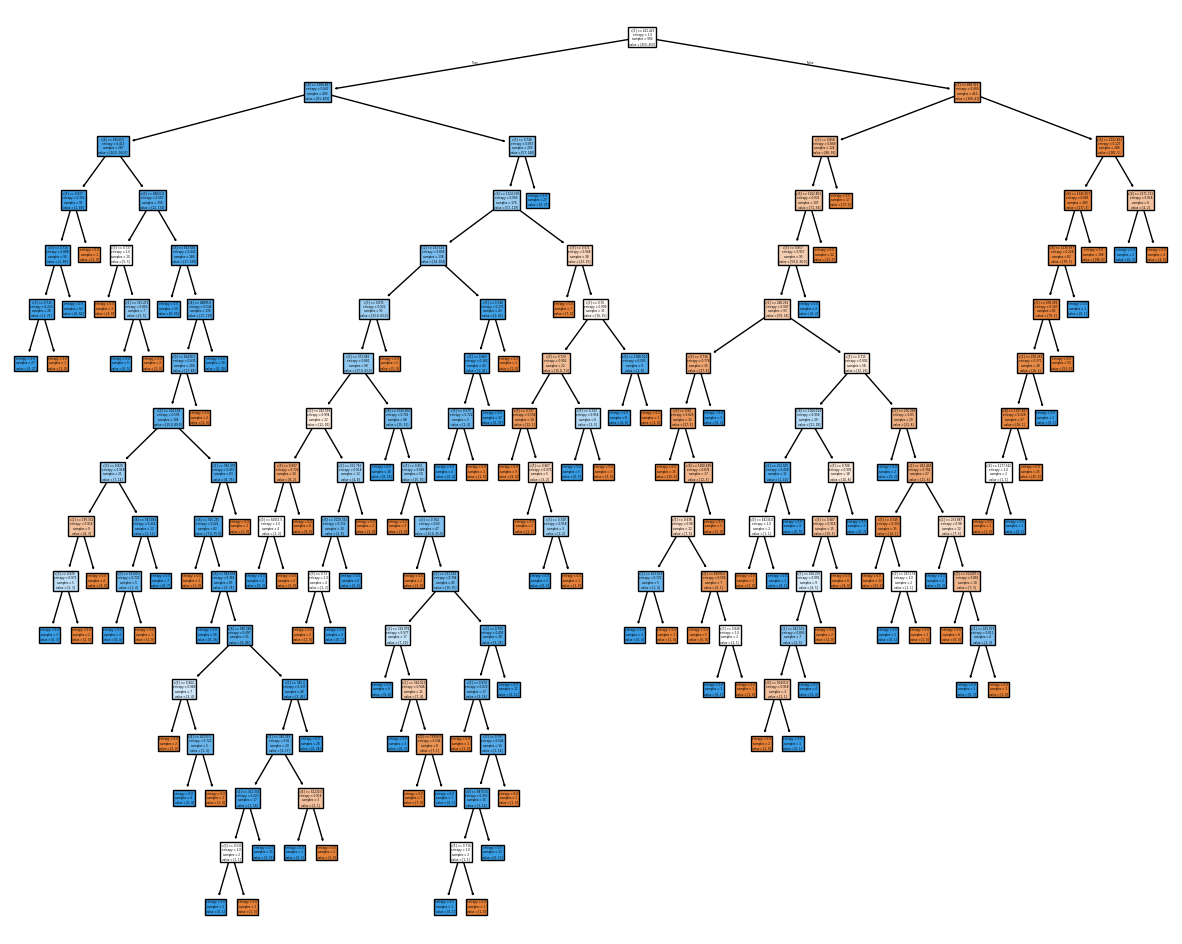

In [35]:
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(classifier,filled = True)

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini')
classifier.fit(df.iloc[:,:-1], df.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6396867340686274, 0.9666666666666667, 'x[1] <= 422.423\ngini = 0.5\nsamples = 900\nvalue = [450, 450]'),
 Text(0.45706954656862747, 0.9, 'x[6] <= 1124.339\ngini = 0.276\nsamples = 490\nvalue = [81, 409]'),
 Text(0.5483781403186274, 0.9333333333333333, 'True  '),
 Text(0.3357077205882353, 0.8333333333333334, 'x[3] <= 0.871\ngini = 0.227\nsamples = 445\nvalue = [58, 387]'),
 Text(0.23851102941176472, 0.7666666666666667, 'x[6] <= 913.694\ngini = 0.21\nsamples = 437\nvalue = [52, 385]'),
 Text(0.07352941176470588, 0.7, 'x[5] <= 0.827\ngini = 0.077\nsamples = 149\nvalue = [6, 143]'),
 Text(0.049019607843137254, 0.6333333333333333, 'x[4] <= 49543.5\ngini = 0.066\nsamples = 147\nvalue = [5.0, 142.0]'),
 Text(0.029411764705882353, 0.5666666666666667, 'x[3] <= 0.716\ngini = 0.022\nsamples = 89\nvalue = [1, 88]'),
 Text(0.0196078431372549, 0.5, 'x[3] <= 0.715\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.00980392156862745, 0.43333333333333335, 'gini = 0.0\nsamples = 27\nvalue =

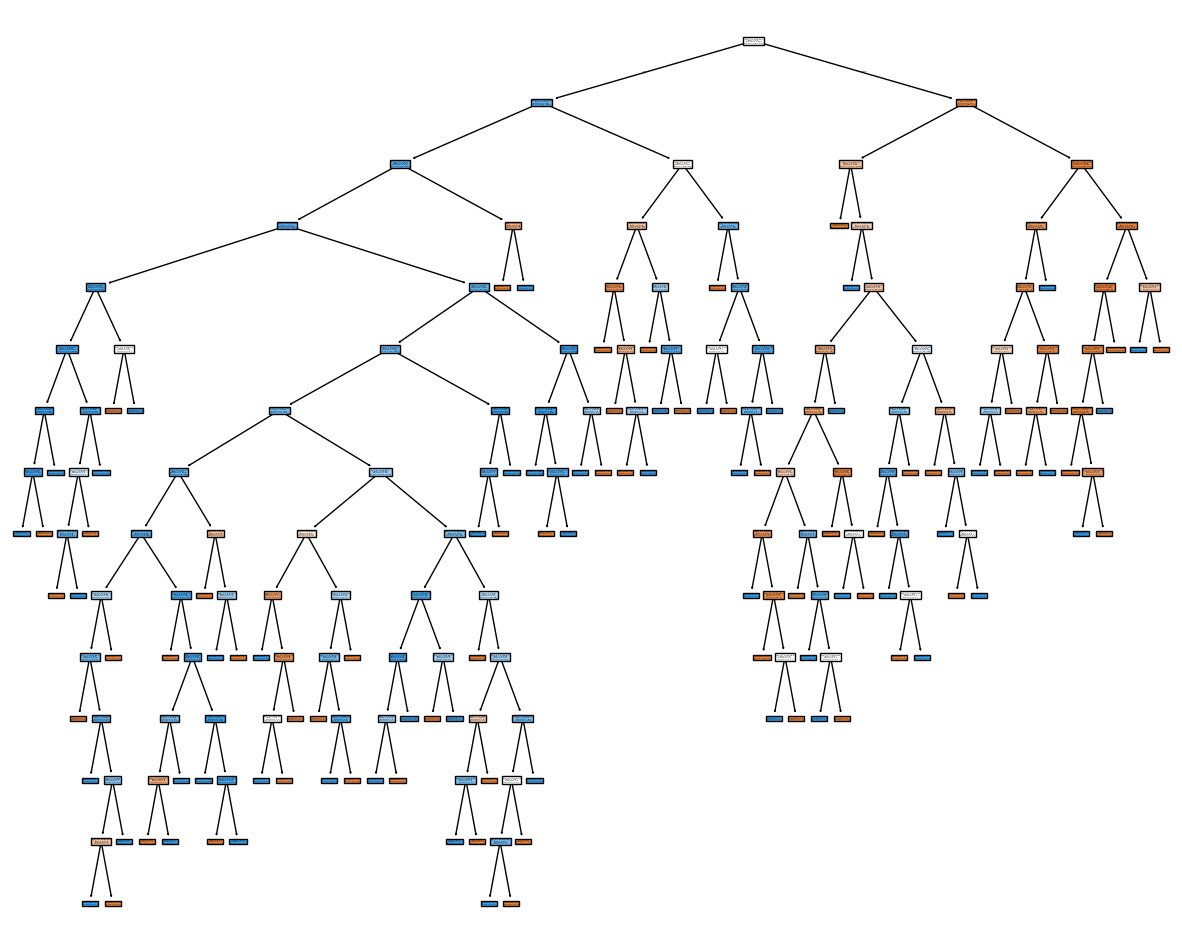

In [37]:
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(classifier,filled = True)

In [38]:
# Prepruning
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
          'min_samples_split' : [2,3,4],
          'min_samples_leaf': [1,2]}
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator = clf, param_grid = params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [39]:
gcv.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [40]:
y_pred = gcv.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1])

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
accuracy_score(y_test,y_pred)

0.8629629629629629

In [43]:
confusion_matrix(y_test,y_pred)

array([[109,  21],
       [ 16, 124]], dtype=int64)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       130
           1       0.86      0.89      0.87       140

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270

